#Exercise 1: Interpretation and significance

Suppose that we would like to know how much families in the US are spending on recreation annually. We've estimated the following model:

$$ expenditure = 873 + 0.0012\ annual\_income + 0.00002\ annual\_income^2 - 223.57\ have\_kids $$

expenditure is the annual spending on recreation in US dollars, annual_income is the annual income in US dollars, and have_kids is a dummy variable indicating the families with children. Interpret the estimated coefficients. What additional statistics should be given in order to make sure that your interpretations make sense statistically. Write up your answer.


**Solution:**

The constant 873 is considered a bias value. It is a factor that is prevalent in most situations(different row values). The first annual income for the household has a minor effect on recreation expenditure, about 0.12%. A second income has even less of an effect, which is close to zero.

Families with kids can expect to pay $223.57 less on average.

Since two of the continuous variables in this model are relatively insignificant, we can run statistical tests with p-values to determine their significance to the model and whether we should drop any.

The graph below demonstrates the relation between the annual reacreation expenditure and the annual income seperately for the families with children and without children.

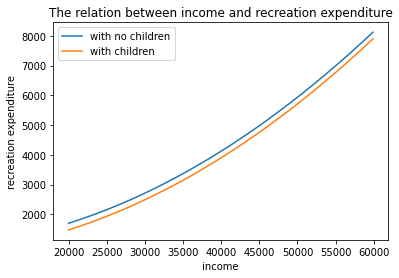

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# X represents annual income
X = np.arange(20000, 60000, 100)
# Y represents annual expenditure on recreation
# for families with no children
Y = 873 + 0.0012*X + 0.000002*(X**2)
# Y_kids represents annual expenditure on recreation
# for families with children
Y_kids = (873 - 223.57) + 0.0012*X + 0.000002*(X**2)


plt1 = plt.plot(X, Y, label="with no children")
plt2 = plt.plot(X, Y_kids, label="with children")
plt.xlabel("income")
plt.ylabel("recreation expenditure")
plt.title("The relation between income and recreation expenditure")
plt.legend()
plt.show()

#Exercise 2: Weather model

In this exercise, you'll work with the historical temperature data from the previous checkpoint. To complete this assignment, submit a link to a Jupyter notebook containing your solutions to the following tasks:

**2.1** First, load the dataset from the weatherinszeged table from Thinkful's database.

**2.2** Build a linear regression model where your target variable is the difference between the apparenttemperature and the temperature. As explanatory variables, use humidity and windspeed. Now, estimate your model using OLS. Are the estimated coefficients statistically significant? Are the signs of the estimated coefficients in line with your previous expectations? Interpret the estimated coefficients. What are the relations between the target and the explanatory variables?

**2.3** Next, include the interaction of humidity and windspeed to the model above and estimate the model using OLS. Are the coefficients statistically significant? Did the signs of the estimated coefficients for humidity and windspeed change? Interpret the estimated coefficients.





*   **2.1 First, load the dataset from the weatherinszeged table from Thinkful's database.** 



In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import linear_model
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.tsa.stattools import acf
from sqlalchemy import create_engine
from scipy.stats import bartlett, jarque_bera, levene, normaltest

import warnings
warnings.filterwarnings('ignore')

postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'weatherinszeged'

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))
weather_df = pd.read_sql_query('select * from weatherinszeged',con=engine)

# no need for an open connection, as we're only doing a single query
engine.dispose()

weather_df.head()

,date,summary,preciptype,temperature,apparenttemperature,humidity,windspeed,windbearing,visibility,loudcover,pressure,dailysummary
0,2006-03-31 22:00:00+00:00,Partly Cloudy,rain,9.472222,7.388889,0.89,14.1197,251.0,15.8263,0.0,1015.13,Partly cloudy throughout the day.
1,2006-03-31 23:00:00+00:00,Partly Cloudy,rain,9.355556,7.227778,0.86,14.2646,259.0,15.8263,0.0,1015.63,Partly cloudy throughout the day.
2,2006-04-01 00:00:00+00:00,Mostly Cloudy,rain,9.377778,9.377778,0.89,3.9284,204.0,14.9569,0.0,1015.94,Partly cloudy throughout the day.
3,2006-04-01 01:00:00+00:00,Partly Cloudy,rain,8.288889,5.944444,0.83,14.1036,269.0,15.8263,0.0,1016.41,Partly cloudy throughout the day.
4,2006-04-01 02:00:00+00:00,Mostly Cloudy,rain,8.755556,6.977778,0.83,11.0446,259.0,15.8263,0.0,1016.51,Partly cloudy throughout the day.


*  **2.2 Build a linear regression model where your target variable is the difference between the apparenttemperature and the temperature. As explanatory variables, use humidity and windspeed. Now, estimate your model using OLS. Are the estimated coefficients statistically significant? Are the signs of the estimated coefficients in line with your previous expectations? Interpret the estimated coefficients. What are the relations between the target and the explanatory variables?**




In [4]:
# Y is the target variable
Y = weather_df['apparenttemperature'] - weather_df['temperature']
# X is the feature set
X = weather_df[['humidity','windspeed']]

# add a constant to the features
X = sm.add_constant(X)

results = sm.OLS(Y, X).fit()

results.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.288
Model:                            OLS   Adj. R-squared:                  0.288
Method:                 Least Squares   F-statistic:                 1.949e+04
Date:                Sun, 19 Jul 2020   Prob (F-statistic):               0.00
Time:                        02:05:07   Log-Likelihood:            -1.7046e+05
No. Observations:               96453   AIC:                         3.409e+05
Df Residuals:                   96450   BIC:                         3.409e+05
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.4381      0.021    115.948      0.000       2.397       2.479
humidity      -3.0292      0.024   -126.479      0.000      -3.076      -2.982
windspeed     -0.1193      0.001   -176.164      0.000      -0.121      -0.118
==============================================================================
Omnibus:                     3935.747   Durbin-Watson:                   0.267
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             4613.311
Skew:                          -0.478   Prob(JB):                         0.00
Kurtosis:                       3.484   Cond. No.                         88.1
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""



All of the estimated coefficients are statistically significant as their p-values are way less than 0.05.

We can expect that as humidity increases the difference between the apparent temperature and the temperature also increases. However, according to our estimations the sign of the coefficient of the humidity is negative. We may also expect that the difference of the apparent tempereture and the temperature negatively related with the wind speed as our estimation says so.

According to the estimated model, 1 point increase in the humidity results in 3.03 points decrease in the target. 1 point increase in the windspeed is associated with 0.12 point decrease in our target.







*   **2.3 Next, include the interaction of humidity and windspeed to the model above and estimate the model using OLS. Are the coefficients statistically significant? Did the signs of the estimated coefficients for humidity and windspeed change? Interpret the estimated coefficients.**




In [5]:

weather_df['humidity_windspeed_interaction'] = weather_df.humidity * weather_df.windspeed

# Y is the target variable
Y = weather_df['apparenttemperature'] - weather_df['temperature']
# X is the feature set
X = weather_df[['humidity','windspeed', 'humidity_windspeed_interaction']]

X = sm.add_constant(X)

results = sm.OLS(Y, X).fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.341
Model:                            OLS   Adj. R-squared:                  0.341
Method:                 Least Squares   F-statistic:                 1.666e+04
Date:                Sun, 19 Jul 2020   Prob (F-statistic):               0.00
Time:                        02:05:08   Log-Likelihood:            -1.6669e+05
No. Observations:               96453   AIC:                         3.334e+05
Df Residuals:                   96449   BIC:                         3.334e+05
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==================================================================================================
                                     coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------
const                              0.0839      0.033      2.511      0.012       0.018       0.149
humidity                           0.1775      0.043      4.133      0.000       0.093       0.262
windspeed                          0.0905      0.002     36.797      0.000       0.086       0.095
humidity_windspeed_interaction    -0.2971      0.003    -88.470      0.000      -0.304      -0.291
==============================================================================
Omnibus:                     4849.937   Durbin-Watson:                   0.265
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             9295.404
Skew:                          -0.378   Prob(JB):                         0.00
Kurtosis:                       4.320   Cond. No.                         193.
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""



*   Similar to the previous model, all of the coefficients are statistically significant as their p-values are less than 0.05.

*   Signs of the both humidity and windspeed changed from negative to the positive when we include the intereaction term.

*   According to the model, 1 point increase in the humidity and windspeed results in 0.18 and 0.09 point increases in the target respectively.

*   The combined effect of wind and humidity has changed coefficients a lot. The constant is a 0.839 degrees bias, humidity has a much lower effect on temperature difference. This time, 1 point increase in the humidity and windspeed results in 0.18 and 0.09 point increases in the target respectively.



#Exercise 3: House prices model
In this exercise, you'll interpret your house prices model. To complete this assignment, submit a link to a Jupyter notebook containing your solutions to the following tasks:

**3.1** Load the houseprices data from Thinkful's database.

**3.2** Run your house prices model again and interpret the results. Which features are statistically significant, and which are not?

**3.3** Now, exclude the insignificant features from your model. Did anything change?

**3.4** Interpret the statistically significant coefficients by quantifying their relations with the house prices. Which features have a more prominent effect on house prices?






*   **3.1 Load the houseprices data from Thinkful's database.**

In [6]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sqlalchemy import create_engine
import statsmodels.api as sm

import warnings
warnings.filterwarnings('ignore')

postgres_user = 'dsbc_student'
postgres_pw = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db = 'houseprices'

In [7]:
engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(
    postgres_user, postgres_pw, postgres_host, postgres_port, postgres_db))
house_prices_df = pd.read_sql_query('select * from houseprices',con=engine)

# no need for an open connection, as we're only doing a single query
engine.dispose()


*   **3.2 Run your house prices model again and interpret the results. Which features are statistically significant, and which are not?**




In [8]:
house_prices_df = pd.concat([house_prices_df,pd.get_dummies(house_prices_df.mszoning, prefix="mszoning", drop_first=True)], axis=1)
house_prices_df = pd.concat([house_prices_df,pd.get_dummies(house_prices_df.street, prefix="street", drop_first=True)], axis=1)
dummy_column_names = list(pd.get_dummies(house_prices_df.mszoning, prefix="mszoning", drop_first=True).columns)
dummy_column_names = dummy_column_names + list(pd.get_dummies(house_prices_df.street, prefix="street", drop_first=True).columns)

In [9]:

# Y is the target variable
Y = house_prices_df['saleprice']
# X is the feature set
X = house_prices_df[['overallqual', 'grlivarea', 'garagecars', 'garagearea', 'totalbsmtsf'] + dummy_column_names]

X = sm.add_constant(X)

results = sm.OLS(Y, X).fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              saleprice   R-squared:                       0.769
Model:                            OLS   Adj. R-squared:                  0.767
Method:                 Least Squares   F-statistic:                     482.0
Date:                Sun, 19 Jul 2020   Prob (F-statistic):               0.00
Time:                        02:05:10   Log-Likelihood:                -17475.
No. Observations:                1460   AIC:                         3.497e+04
Df Residuals:                    1449   BIC:                         3.503e+04
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -1.173e+05    1.8e+04     -6.502      0.000   -1.53e+05   -8.19e+04
overallqual  2.333e+04   1088.506     21.430      0.000    2.12e+04    2.55e+04
grlivarea      45.6344      2.468     18.494      0.000      40.794      50.475
garagecars   1.345e+04   2990.453      4.498      0.000    7584.056    1.93e+04
garagearea     16.4082     10.402      1.577      0.115      -3.997      36.813
totalbsmtsf    28.3816      2.931      9.684      0.000      22.633      34.131
mszoning_FV  2.509e+04   1.37e+04      1.833      0.067   -1761.679    5.19e+04
mszoning_RH  1.342e+04   1.58e+04      0.847      0.397   -1.77e+04    4.45e+04
mszoning_RL  2.857e+04   1.27e+04      2.246      0.025    3612.782    5.35e+04
mszoning_RM  9047.7894   1.29e+04      0.702      0.483   -1.62e+04    3.43e+04
street_Pave   151.0376   1.63e+04      0.009      0.993   -3.18e+04    3.21e+04
==============================================================================
Omnibus:                      415.883   Durbin-Watson:                   1.979
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            41281.526
Skew:                          -0.115   Prob(JB):                         0.00
Kurtosis:                      29.049   Cond. No.                     5.53e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.53e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""


The statistically significant variables are overallqual, grlivarea, garagecars, totalbsmtsf, mszoning_FV and mszoning_RL. All the other variables are statistically insignificant and hence their coefficients are statistically zero. According to the estimation results:

1 point increase in overallqual results in \$23330 increase in sale price.

1 point increase in grlivarea results in \$45.6344 increase in sale price.

1 point increase in garagecars results in \$13450 increase in sale price.

1 point increase in totalbsmtsf results in \$28.3816 increase in sale price.

Average sale price is higher in mszoning_FV and mszoning_RL than the base zone by \$25090 and \$28570 respectively. So, the average house price is the highest in mszoning_RL.


*   **3.2 Now, exclude the insignificant features from your model. Did anything change?**



In [10]:
# Y is the target variable
Y = house_prices_df['saleprice']
# X is the feature set
X = house_prices_df[['overallqual', 'grlivarea', 'garagecars', 'totalbsmtsf', 'mszoning_FV', 'mszoning_RL']]

X = sm.add_constant(X)

results = sm.OLS(Y, X).fit()

results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              saleprice   R-squared:                       0.768
Model:                            OLS   Adj. R-squared:                  0.767
Method:                 Least Squares   F-statistic:                     803.3
Date:                Sun, 19 Jul 2020   Prob (F-statistic):               0.00
Time:                        02:05:10   Log-Likelihood:                -17476.
No. Observations:                1460   AIC:                         3.497e+04
Df Residuals:                    1453   BIC:                         3.500e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
const       -1.087e+05   4792.537    -22.674      0.000   -1.18e+05   -9.93e+04
overallqual  2.332e+04   1078.278     21.628      0.000    2.12e+04    2.54e+04
grlivarea      45.9659      2.452     18.743      0.000      41.155      50.777
garagecars   1.721e+04   1732.720      9.931      0.000    1.38e+04    2.06e+04
totalbsmtsf    29.3276      2.858     10.261      0.000      23.721      34.934
mszoning_FV  1.679e+04   5560.901      3.020      0.003    5885.005    2.77e+04
mszoning_RL  1.968e+04   2833.445      6.946      0.000    1.41e+04    2.52e+04
==============================================================================
Omnibus:                      406.420   Durbin-Watson:                   1.977
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            37605.498
Skew:                          -0.057   Prob(JB):                         0.00
Kurtosis:                      27.863   Cond. No.                     1.11e+04
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.11e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

The results resemble the previous model's results. The estimated coefficients are close to the previous model except the dummy variables. The coefficients of the dummies changed relatively larger than the other variables.

* **3.4 Interpret the statistically significant coefficients by quantifying their relations with the house prices. Which features have a more prominent effect on house prices?**

Considering the results, the most prominent factors affecting the sale price seem to be the overallqual and the mszoning.